In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Temel Kütüphaneleri Yükleme (Kaggle'ın başlangıç koduna ek olarak)
import numpy as np # Lineer cebir işlemleri için
import pandas as pd # Veri işleme ve CSV okuma için
import os # Dosya yolları işlemleri için

# NLP (Doğal Dil İşleme) ve Görselleştirme Kütüphaneleri
import re # Metin işlemleri için regex
import nltk # Doğal dil işleme toolkiti
from nltk.corpus import stopwords # Stop words kaldırma için
from nltk.stem import WordNetLemmatizer # Kelimeleri köklerine indirme için
from collections import Counter # Kelime sayımları için
import matplotlib.pyplot as plt # Grafikler için
import seaborn as sns # Daha güzel grafikler için
from wordcloud import WordCloud # Kelime bulutu oluşturmak için

# Makine Öğrenimi Kütüphaneleri
from sklearn.model_selection import train_test_split # Veri setini eğitim/test olarak ayırmak için
from sklearn.feature_extraction.text import TfidfVectorizer # Metin vektörleştirme için
from sklearn.linear_model import LogisticRegression # Sınıflandırma algoritması
from sklearn.svm import SVC # Sınıflandırma algoritması
from sklearn.naive_bayes import MultinomialNB # Sınıflandırma algoritması
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay # Model değerlendirme metrikleri

# NLTK kaynaklarını indirme (Bu kısım hatayı giderir)
# Kaggle ortamında genellikle bir kez indirdiğinizde oturum boyunca kalır.
print("NLTK kaynakları indiriliyor...")
nltk.download('stopwords')
nltk.download('wordnet')
print("NLTK stopwords ve wordnet başarıyla indirildi.")


# Veri Setini Yükleme
# Kaggle'daki veri setinin yolunu otomatik bulmak için os.walk kullanıyoruz.
# tripadvisor_hotel_reviews.csv dosyasının yolunu bulup okuyacağız.
file_path = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if 'tripadvisor_hotel_reviews.csv' in filename:
            file_path = os.path.join(dirname, filename)
            break
    if file_path:
        break

if file_path:
    df = pd.read_csv(file_path)
    print(f"Veri seti başarıyla yüklendi: {file_path}")
else:
    print("Hata: 'tripadvisor_hotel_reviews.csv' dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    # Eğer Kaggle dışında çalışıyorsanız, dosyanın doğru yolda olduğundan emin olun ve elle yükleyin:
    # df = pd.read_csv('tripadvisor_hotel_reviews.csv')

NLTK kaynakları indiriliyor...
NLTK stopwords ve wordnet başarıyla indirildi.


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Veri seti başarıyla yüklendi: /kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv


Veri setinin ilk 5 satırı:
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

Veri setinin boyutu (satır, sütun): (20491, 2)

Veri setinin bilgi özeti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None

'Review' sütunundaki benzersiz yorum sayısı: 20491
'Rating' sütunundaki benzersiz puan sayısı: 5
Rating sütunundaki benzersiz puanlar: [4 2 3 5 1]

Eksik veri kontrolü:
Review    0
Rating    0
dtype: int64


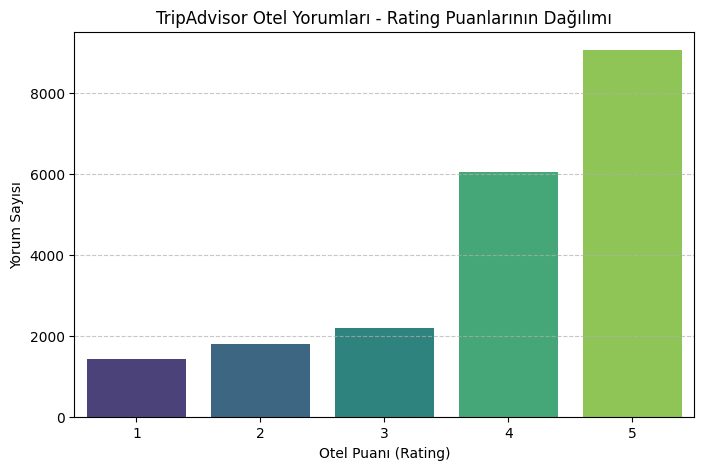


**Şekil 1: Rating Puanlarının Dağılımı**
Açıklama: Otel yorumlarının puan dağılımı, genellikle yüksek puanların (4 ve 5 yıldız) veri setinde daha fazla olduğunu göstermektedir. Bu durum, modelin dengesiz sınıflarla başa çıkma stratejilerini gerektirebilir.


In [3]:
# Veri setinin ilk 5 satırını görüntüleme
print("Veri setinin ilk 5 satırı:")
print(df.head())

# Veri setinin boyutlarını kontrol etme (satır ve sütun sayısı)
print("\nVeri setinin boyutu (satır, sütun):", df.shape)

# Sütun isimlerini ve veri tiplerini kontrol etme
print("\nVeri setinin bilgi özeti:")
print(df.info())

# Her iki sütunun da benzersiz değer sayılarını ve ilk birkaçını gösterme
print("\n'Review' sütunundaki benzersiz yorum sayısı:", df['Review'].nunique())
print("'Rating' sütunundaki benzersiz puan sayısı:", df['Rating'].nunique())
print("Rating sütunundaki benzersiz puanlar:", df['Rating'].unique())

# Eksik veri kontrolü
print("\nEksik veri kontrolü:")
print(df.isnull().sum())

# Rating puanlarının dağılımını görselleştirme (Raporunuzdaki Şekil 1)
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('TripAdvisor Otel Yorumları - Rating Puanlarının Dağılımı')
plt.xlabel('Otel Puanı (Rating)')
plt.ylabel('Yorum Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n**Şekil 1: Rating Puanlarının Dağılımı**")
print("Açıklama: Otel yorumlarının puan dağılımı, genellikle yüksek puanların (4 ve 5 yıldız) veri setinde daha fazla olduğunu göstermektedir. Bu durum, modelin dengesiz sınıflarla başa çıkma stratejilerini gerektirebilir.")

Yorum metinleri temizleniyor...
Metin temizleme tamamlandı.

--- Metin Temizleme Örneği ---
Orijinal Yorum:
great location staff location price make older hotel good choice, staff friendly, looking modern place not, old studio apartment building run hotel, great neighborhood close great local resturants, hotel does not sterile tourist feeling newer mid range hotels, feels like small european hotel, yes rooms use little moderizing compermise, just reservations stay,  

Temizlenmiş Yorum:
great location staff location price make older hotel good choice staff friendly looking modern place old studio apartment building run hotel great neighborhood close great local resturants hotel sterile tourist feeling newer mid range hotel feel like small european hotel yes room use little moderizing compermise reservation stay


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


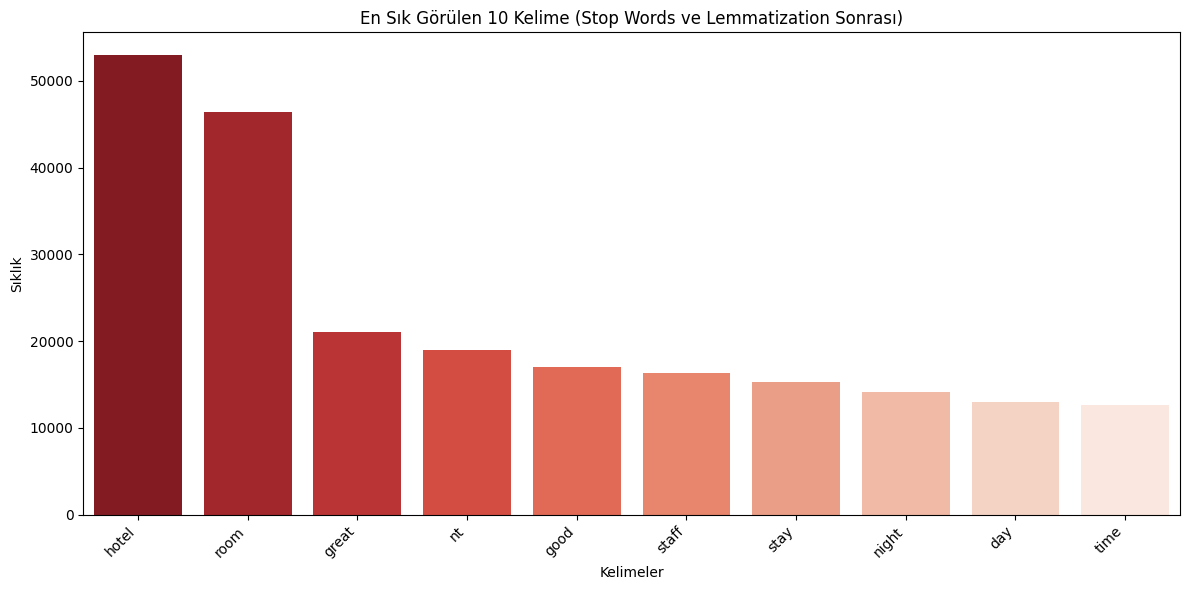


**Şekil 2: En Sık Görülen 10 Kelime (Stop Words ve Lemmatization Sonrası)**
Açıklama: Temizlik sonrası yorumlarda en sık görülen kelimeler, genellikle otel hizmetleri (room, staff, hotel) ve genel deneyimle (great, good, stay, nice) ilgili terimleri içermektedir. Bu kelimeler, müşterilerin genel algısını yansıtmaktadır.


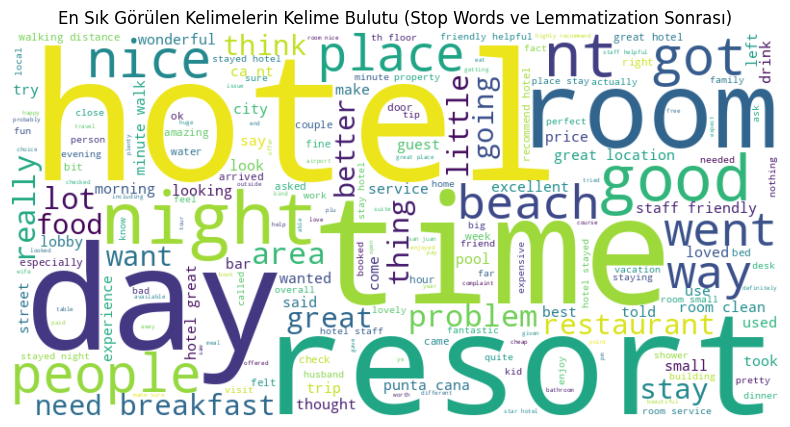


**Şekil 2 (Alternatif): En Sık Görülen Kelimelerin Kelime Bulutu**
Açıklama: Kelime bulutu, en sık geçen kelimeleri boyutlarına göre görselleştirerek yorumların genel temasını hızlıca anlamamızı sağlar.


In [4]:
# Metin Temizleme Fonksiyonu
def preprocess_text(text):
    # 1. Küçük harfe dönüştürme
    text = text.lower()
    # 2. Noktalama işaretlerini, sayıları ve özel karakterleri kaldırma
    # Sadece küçük harf ve boşlukları koru.
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. Tokenizasyon (kelimelere ayırma)
    tokens = text.split()
    # 4. Stop Words (durdurma kelimeleri) kaldırma
    stop_words = set(stopwords.words('english')) # İngilizce stop words kullanılıyor
    tokens = [word for word in tokens if word not in stop_words]
    # 5. Lemmatization (kelimeleri köklerine indirme)
    # Kelimelerin farklı çekimlerini aynı köke indirgeyerek kelime hazinesini optimize eder.
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Temizlenmiş kelimeleri tekrar birleştirme
    return ' '.join(tokens)

# Temizleme fonksiyonunu 'Review' sütununa uygulama
# Bu işlem biraz zaman alabilir, veri setinin boyutuna bağlıdır.
print("Yorum metinleri temizleniyor...")
df['cleaned_review'] = df['Review'].apply(preprocess_text)
print("Metin temizleme tamamlandı.")

# Temizleme öncesi ve sonrası bir örnek yorum gösterimi
print("\n--- Metin Temizleme Örneği ---")
print("Orijinal Yorum:")
print(df['Review'].iloc[100]) # 100. indeksteki yorumu örnek alalım
print("\nTemizlenmiş Yorum:")
print(df['cleaned_review'].iloc[100])

# En sık geçen kelimeleri bulma ve görselleştirme (Raporunuzdaki Şekil 2)
# Tüm temizlenmiş yorumları tek bir string'e birleştirme
all_words = ' '.join(df['cleaned_review'])
# Kelime sıklıklarını sayma
word_counts = Counter(all_words.split())
# En sık geçen 10 kelimeyi alma
most_common_words = word_counts.most_common(10)

# Bar grafiği oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette='Reds_r')
plt.xlabel('Kelimeler')
plt.ylabel('Sıklık')
plt.title('En Sık Görülen 10 Kelime (Stop Words ve Lemmatization Sonrası)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n**Şekil 2: En Sık Görülen 10 Kelime (Stop Words ve Lemmatization Sonrası)**")
print("Açıklama: Temizlik sonrası yorumlarda en sık görülen kelimeler, genellikle otel hizmetleri (room, staff, hotel) ve genel deneyimle (great, good, stay, nice) ilgili terimleri içermektedir. Bu kelimeler, müşterilerin genel algısını yansıtmaktadır.")

# Alternatif olarak, kelime bulutu oluşturma (İsteğe bağlı, ek olarak kullanabilirsin)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('En Sık Görülen Kelimelerin Kelime Bulutu (Stop Words ve Lemmatization Sonrası)')
plt.show()
print("\n**Şekil 2 (Alternatif): En Sık Görülen Kelimelerin Kelime Bulutu**")
print("Açıklama: Kelime bulutu, en sık geçen kelimeleri boyutlarına göre görselleştirerek yorumların genel temasını hızlıca anlamamızı sağlar.")

In [5]:
# TF-IDF Vektörleştirme
# max_features=5000: En sık geçen 5000 kelimeyi özellik olarak kullanırız.
# Bu, hem boyutu azaltır hem de modelin daha az gürültülü veriye odaklanmasını sağlar.
print("\nTF-IDF vektörleştirme başlatılıyor...")
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review']) # Bağımsız değişkenler (yorum metinleri)
y = df['Rating'] # Bağımlı değişken (rating puanları)
print("TF-IDF vektörleştirme tamamlandı. Özellik matrisinin boyutu:", X.shape)

# Eğitim/Test Ayrımı (%80 Eğitim, %20 Test)
# stratify=y parametresi, hedef değişkenin (Rating) her sınıfının oranlarının
# hem eğitim hem de test setlerinde korunmasını sağlar. Bu, sınıf dengesizliği olan durumlarda önemlidir.
print("Veri seti eğitim ve test olarak ayrılıyor...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Eğitim seti boyutu: {X_train.shape[0]} satır")
print(f"Test seti boyutu: {X_test.shape[0]} satır")


TF-IDF vektörleştirme başlatılıyor...
TF-IDF vektörleştirme tamamlandı. Özellik matrisinin boyutu: (20491, 5000)
Veri seti eğitim ve test olarak ayrılıyor...
Eğitim seti boyutu: 16392 satır
Test seti boyutu: 4099 satır



Eğitim seti boyutu: 16392 satır
Test seti boyutu: 4099 satır

--- Logistic Regression Modeli Eğitiliyor ve Değerlendiriliyor ---
Doğruluk (Accuracy): 0.6065
Kesinlik (Precision): 0.5842
Duyarlılık (Recall): 0.6065
F1-Skor: 0.5838

Logistic Regression Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.72      0.67      0.69       284
           2       0.48      0.29      0.36       359
           3       0.44      0.18      0.26       437
           4       0.50      0.49      0.49      1208
           5       0.68      0.84      0.75      1811

    accuracy                           0.61      4099
   macro avg       0.56      0.49      0.51      4099
weighted avg       0.58      0.61      0.58      4099



<Figure size 800x600 with 0 Axes>

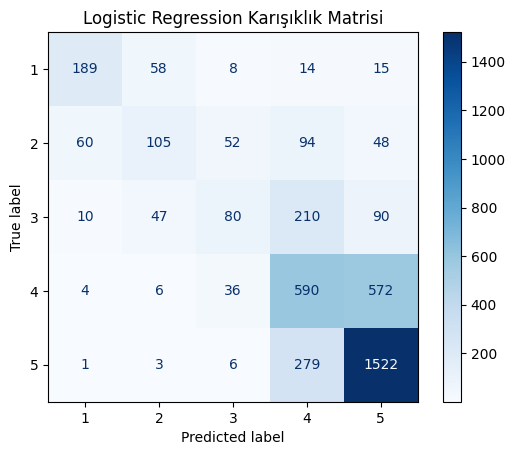


Şekil X: Logistic Regression Karışıklık Matrisi (Bu kısma modelinize göre doğru şekil numarasını verin)
Açıklama: Logistic Regression modelinin gerçek ve tahmin edilen sınıflandırmalarını göstermektedir.

--- SVC Modeli Eğitiliyor ve Değerlendiriliyor ---
Doğruluk (Accuracy): 0.6155
Kesinlik (Precision): 0.6046
Duyarlılık (Recall): 0.6155
F1-Skor: 0.6080

SVC Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.73      0.67      0.70       284
           2       0.44      0.44      0.44       359
           3       0.40      0.27      0.32       437
           4       0.51      0.52      0.51      1208
           5       0.73      0.79      0.76      1811

    accuracy                           0.62      4099
   macro avg       0.56      0.54      0.55      4099
weighted avg       0.60      0.62      0.61      4099



<Figure size 800x600 with 0 Axes>

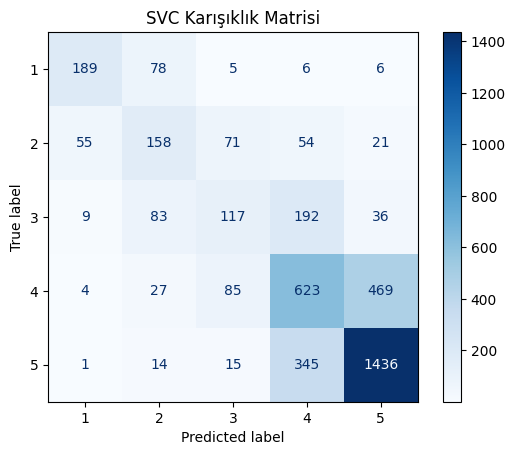


Şekil X: SVC Karışıklık Matrisi (Bu kısma modelinize göre doğru şekil numarasını verin)
Açıklama: SVC modelinin gerçek ve tahmin edilen sınıflandırmalarını göstermektedir.

--- Multinomial Naive Bayes Modeli Eğitiliyor ve Değerlendiriliyor ---
Doğruluk (Accuracy): 0.5521
Kesinlik (Precision): 0.5113
Duyarlılık (Recall): 0.5521
F1-Skor: 0.4997

Multinomial Naive Bayes Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.80      0.36      0.49       284
           2       0.39      0.20      0.27       359
           3       0.27      0.01      0.02       437
           4       0.40      0.39      0.40      1208
           5       0.62      0.89      0.73      1811

    accuracy                           0.55      4099
   macro avg       0.50      0.37      0.38      4099
weighted avg       0.51      0.55      0.50      4099



<Figure size 800x600 with 0 Axes>

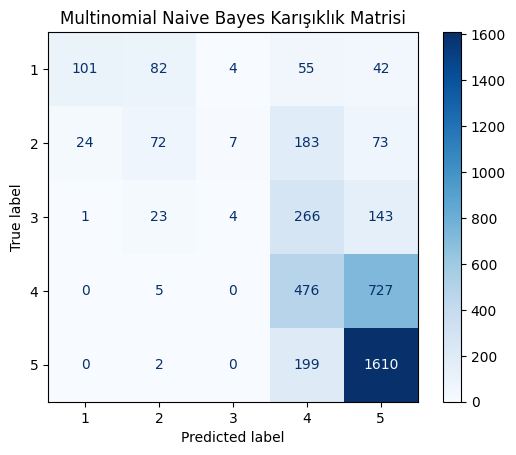


Şekil X: Multinomial Naive Bayes Karışıklık Matrisi (Bu kısma modelinize göre doğru şekil numarasını verin)
Açıklama: Multinomial Naive Bayes modelinin gerçek ve tahmin edilen sınıflandırmalarını göstermektedir.

--- Sınıflandırma Modeli Performans Metrikleri Karşılaştırması ---
                         Accuracy  Precision  Recall  F1-Score
Logistic Regression        0.6065     0.5842  0.6065    0.5838
SVC                        0.6155     0.6046  0.6155    0.6080
Multinomial Naive Bayes    0.5521     0.5113  0.5521    0.4997

Tablo 1: Sınıflandırma Modeli Performans Metrikleri Karşılaştırması
Açıklama: Farklı sınıflandırma modellerinin doğruluk, kesinlik, duyarlılık ve F1-Skor metriklerine göre karşılaştırılması.


In [6]:
# Eğitim/Test Ayrımı (%80 Eğitim, %20 Test)
# stratify=y, hedef değişkenin (Rating) oranlarını eğitim ve test setlerinde korur.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nEğitim seti boyutu: {X_train.shape[0]} satır")
print(f"Test seti boyutu: {X_test.shape[0]} satır")

# Modelleri Tanımlama
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'), # Multiclass için uygun solver
    'SVC': SVC(kernel='linear'), # Çekirdek tipi belirtilebilir
    'Multinomial Naive Bayes': MultinomialNB()
}

# Modelleri Eğitme ve Değerlendirme
results = {}

for model_name, model in models.items():
    print(f"\n--- {model_name} Modeli Eğitiliyor ve Değerlendiriliyor ---")
    model.fit(X_train, y_train) # Modeli eğitme
    y_pred = model.predict(X_test) # Test seti üzerinde tahmin yapma

    # Performans Metrikleri Hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    # Precision, Recall, F1-Score çok sınıflı sınıflandırmada 'weighted' ortalaması ile daha anlamlıdır.
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"Doğruluk (Accuracy): {accuracy:.4f}")
    print(f"Kesinlik (Precision): {precision:.4f}")
    print(f"Duyarlılık (Recall): {recall:.4f}")
    print(f"F1-Skor: {f1:.4f}")

    # Sınıflandırma Raporu (Raporunuzdaki Tablo 2, 3, 4)
    print(f"\n{model_name} Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Karışıklık Matrisi Görselleştirme (Raporunuzdaki Şekil 3, 4, 5)
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, values_format='d')
    disp.ax_.set_title(f'{model_name} Karışıklık Matrisi')
    plt.show()
    print(f"\nŞekil X: {model_name} Karışıklık Matrisi (Bu kısma modelinize göre doğru şekil numarasını verin)")
    print(f"Açıklama: {model_name} modelinin gerçek ve tahmin edilen sınıflandırmalarını göstermektedir.")


# Tüm modellerin sonuçlarını karşılaştırma tablosu (Raporunuzdaki Tablo 1)
results_df = pd.DataFrame(results).T
print("\n--- Sınıflandırma Modeli Performans Metrikleri Karşılaştırması ---")
print(results_df.round(4))

print("\nTablo 1: Sınıflandırma Modeli Performans Metrikleri Karşılaştırması")
print("Açıklama: Farklı sınıflandırma modellerinin doğruluk, kesinlik, duyarlılık ve F1-Skor metriklerine göre karşılaştırılması.")